<a href="https://colab.research.google.com/github/Heleinef/Data-Science-Master_Heleine/blob/main/FinalProject_data620.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project - Data 620
# Team Members: Heleine, Gabriel, Kossi, Victor

# **Topic:** Analyzing Pro-ISIS Twitter Activity From 2015 to 2016
---




**The research question:** How have ISIS fans been using Twitter since 2015 Paris Attacks?

**Rationale:** To contribute to a better understanding of online radicalization and the working of extremist networks, for effective counteterrorism.

**The dataset:** The tweets dataset contains data scraped over 17,000 tweets from 100+ pro-ISIS fanboys from all over the world since the November 2015 Paris Attack until May 2016.                                                      The dataset includes the following:

Name, Username, Description, Location, Number of followers at the time the tweet was downloaded, Number of statuses by the user when the tweet was downloaded, Date and timestamp of the tweet and the tweet itself.

**Sources:** https://www.kaggle.com/datasets/fifthtribe/how-isis-uses-twitter

**Librairies used:**
pandas, networkx, matplotlib, nltk, spacy, plotly, collections,re, nltk.corpus, nltk.sentiment, urllib.parse.


# I. Import and load the dataset:

In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Heleinef/Data-Science-Master_Heleine/main/tweets.csv')

# Display the first few rows of the dataset
print(df.head())




            name         username  \
0  GunsandCoffee  GunsandCoffee70   
1  GunsandCoffee  GunsandCoffee70   
2  GunsandCoffee  GunsandCoffee70   
3  GunsandCoffee  GunsandCoffee70   
4  GunsandCoffee  GunsandCoffee70   

                                    description location  followers  \
0  ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews      NaN        640   
1  ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews      NaN        640   
2  ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews      NaN        640   
3  ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews      NaN        640   
4  ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews      NaN        640   

   numberstatuses            time  \
0              49  1/6/2015 21:07   
1              49  1/6/2015 21:27   
2              49  1/6/2015 21:29   
3              49  1/6/2015 21:37   
4              49  1/6/2015 21:45   

                                              tweets  
0  ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFU...  
1  ENGLISH TRANSL

# II. Social Network Cluster Analysis:

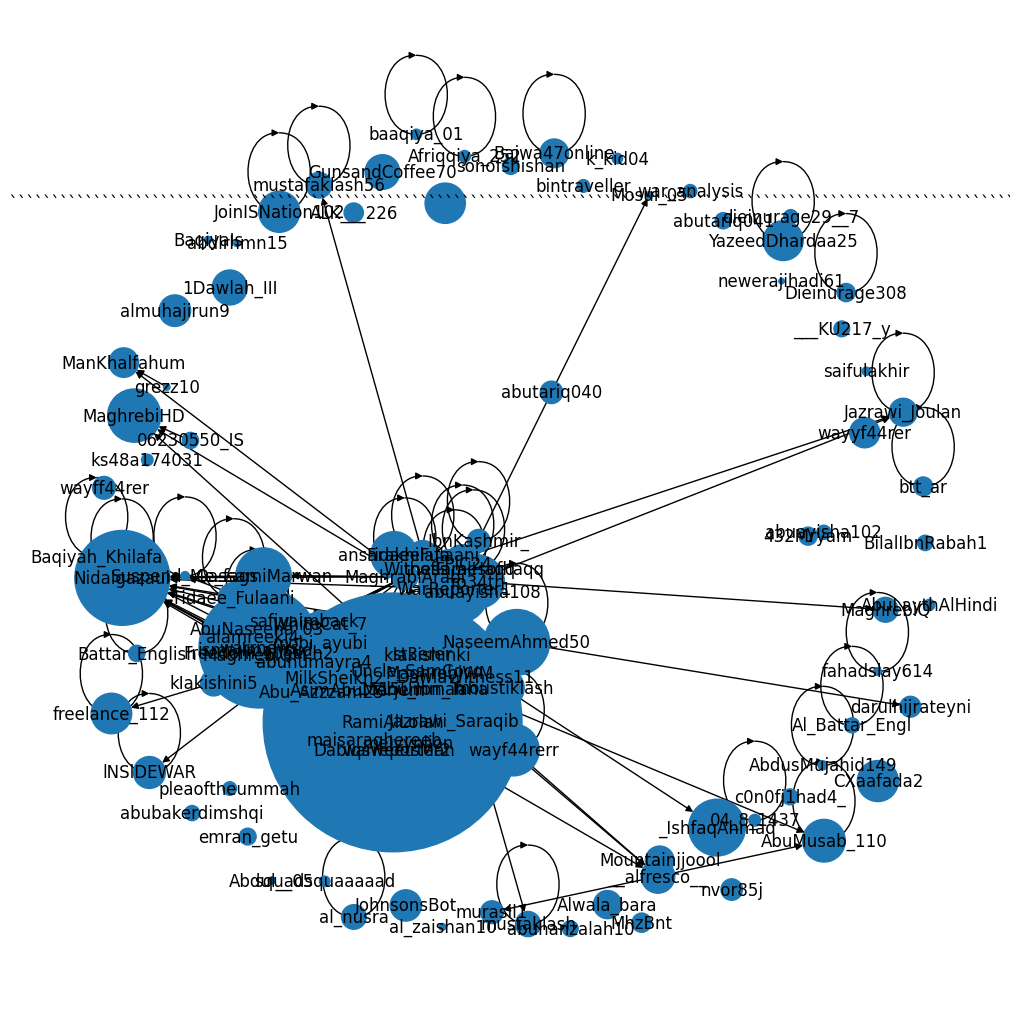

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming df['username'] and df['followers'] contains necessary data for network
G = nx.DiGraph()

for i, row in df.iterrows():
    G.add_node(row['username'], followers=row['followers'])

for i, row in df.iterrows():
    mentions = [word for word in row['tweets'].split() if word.startswith('@')]
    for mention in mentions:
        mentioned_user = mention[1:]
        if mentioned_user in df['username'].values:
            G.add_edge(row['username'], mentioned_user)

# Draw the network
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.1)
followers = nx.get_node_attributes(G, 'followers')
node_size = [followers[node] for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_size=node_size)
plt.show()


# Key Influencers:

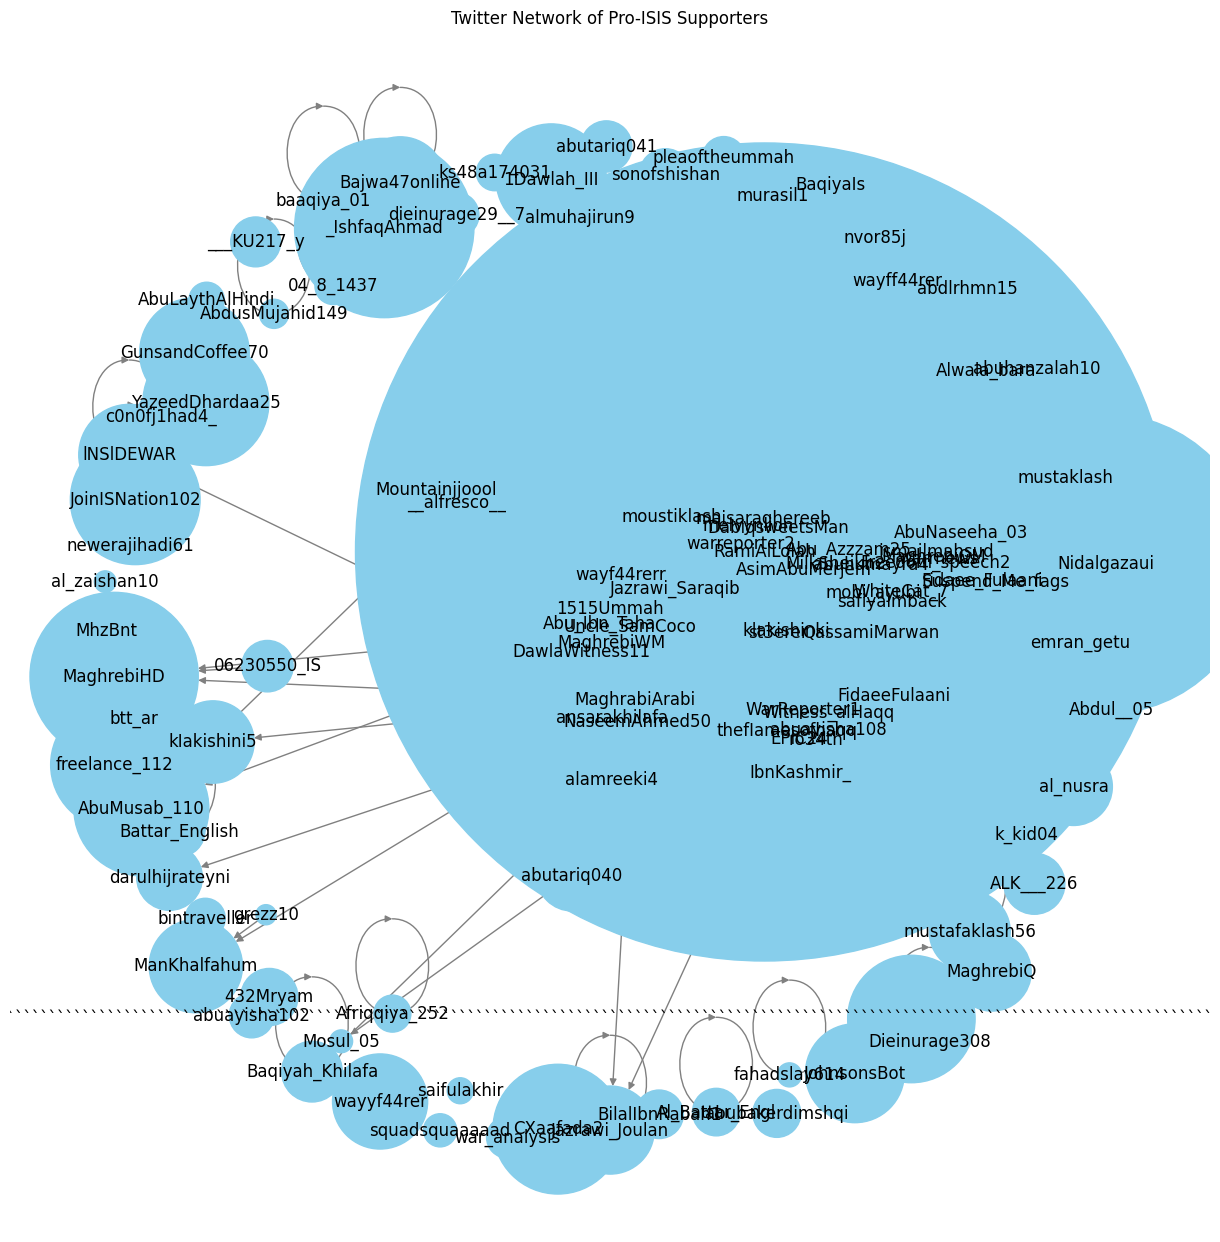

In [30]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph
G = nx.DiGraph()

# Add nodes and edges
for i, row in df.iterrows():
    G.add_node(row['username'], followers=row['followers'])

for i, row in df.iterrows():
    mentions = [word for word in row['tweets'].split() if word.startswith('@')]
    for mention in mentions:
        mentioned_user = mention[1:]
        if mentioned_user in df['username'].values:
            G.add_edge(row['username'], mentioned_user)

# Draw the network with nodes scaled by followers
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.1)
followers = nx.get_node_attributes(G, 'followers')
node_size = [followers[node] * 10 for node in G.nodes()]  # Scale node size
nx.draw(G, pos, with_labels=True, node_size=node_size, node_color='skyblue', edge_color='gray')
plt.title('Twitter Network of Pro-ISIS Supporters')
plt.show()


# Keyword Analysis:

In [16]:
from collections import Counter
from nltk.corpus import stopwords
import re

# Initialize stopwords
stop_words = set(stopwords.words('english'))

# Combine relevant columns for keyword extraction
text_data = df['name'].fillna('') + ' ' + df['username'].fillna('') + ' ' + df['description'].fillna('') + ' ' + df['location'].fillna('') + ' ' + df['tweets'].fillna('')

# Tokenize and clean text
words = re.findall(r'\w+', ' '.join(text_data).lower())
words = [word for word in words if word not in stop_words]

# Count word frequencies
word_counts = Counter(words)
common_words = word_counts.most_common(20)
print(common_words)


[('https', 9739), ('co', 8790), ('rt', 6002), ('news', 4207), ('syria', 3956), ('al', 3913), ('freedom', 3605), ('america', 3220), ('war', 3107), ('usa', 2967), ('isis', 2453), ('middle', 2311), ('conflict', 2228), ('anti', 2223), ('time', 2217), ('east', 2202), ('ramiallolah', 2053), ('also', 2028), ('reports', 1940), ('world', 1848)]


Visualizing The Top 20 Keywords Used by Pro-ISIS Supporters

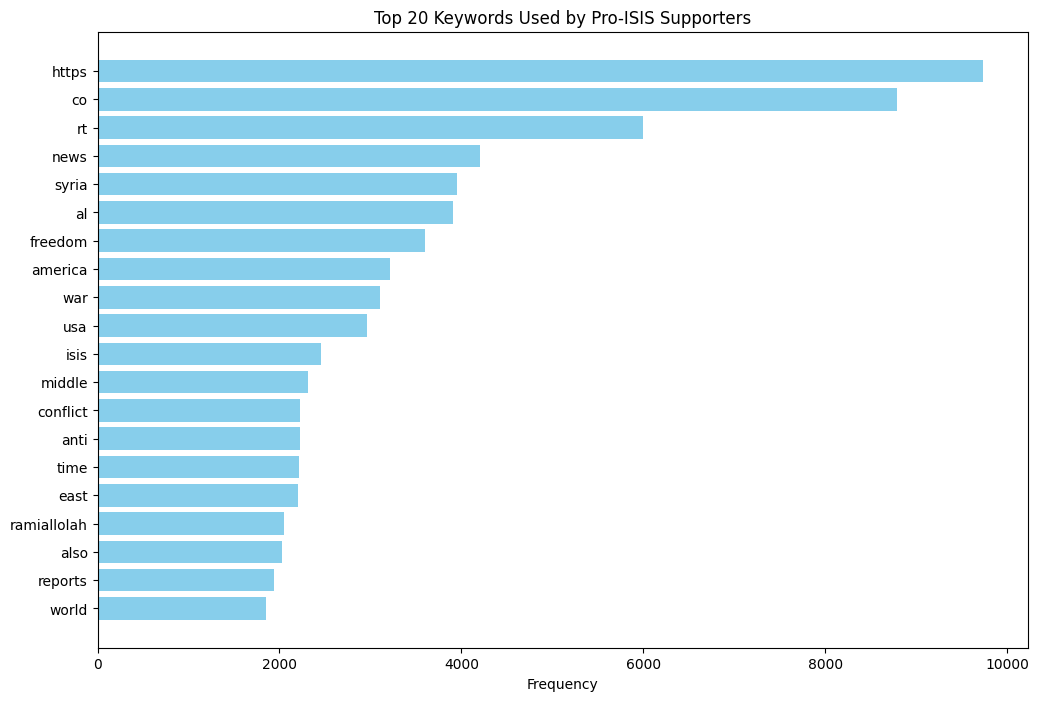

In [33]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import re
from nltk.corpus import stopwords

df = pd.read_csv('https://raw.githubusercontent.com/Heleinef/Data-Science-Master_Heleine/main/tweets.csv')

# Combine relevant columns for keyword extraction
text_data = df['name'].fillna('') + ' ' + df['username'].fillna('') + ' ' + df['description'].fillna('') + ' ' + df['location'].fillna('') + ' ' + df['tweets'].fillna('')

# Tokenize and clean text
stop_words = set(stopwords.words('english'))
words = re.findall(r'\w+', ' '.join(text_data).lower())
words = [word for word in words if word not in stop_words]

# Count word frequencies
word_counts = Counter(words)
common_words = word_counts.most_common(20)

# Data for plotting
keywords, counts = zip(*common_words)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.barh(keywords, counts, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 20 Keywords Used by Pro-ISIS Supporters')
plt.gca().invert_yaxis()
plt.show()


# Data Categorization of Links:

In [18]:
from urllib.parse import urlparse

# Extract domains from URLs in tweets
df['domains'] = df['tweets'].apply(lambda tweet: [urlparse(url).netloc for url in re.findall(r'http[s]?://\S+', tweet)])

# Flatten the list of domains
all_domains = [domain for sublist in df['domains'] for domain in sublist]

# Count domain frequencies
domain_counts = Counter(all_domains)
print(domain_counts.most_common(10))


[('t.co', 8647), ('…', 183), ('t…', 151), ('t.…', 136), ('t.c…', 110), ('t.co…', 73)]


# Main locations:

<ipython-input-32-e263bec5952c>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Matplotlib currently does not support Arabic natively.



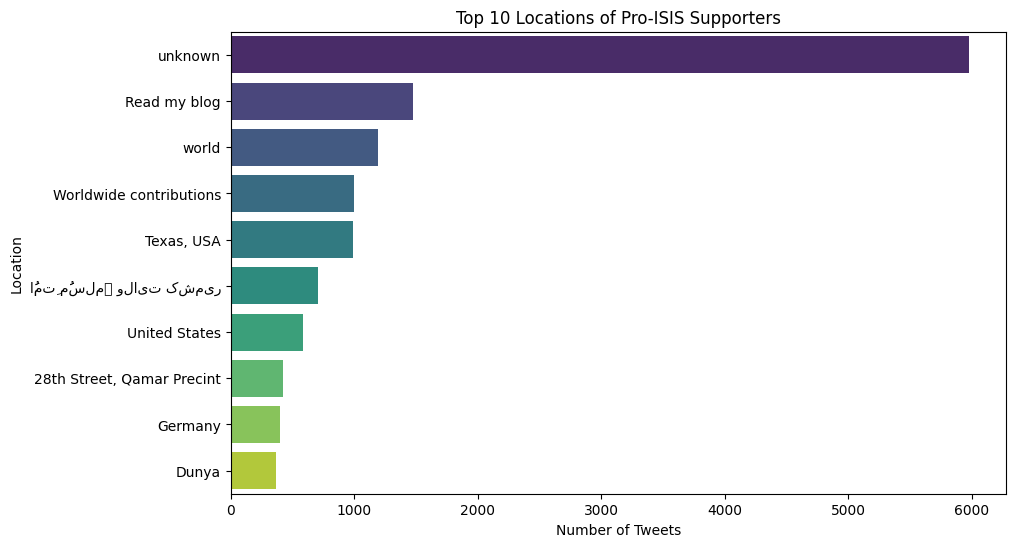

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean and filter location data
df['location'] = df['location'].fillna('Unknown')
location_counts = df['location'].value_counts().head(10)

# Plot locations
plt.figure(figsize=(10, 6))
sns.barplot(y=location_counts.index, x=location_counts.values, palette='viridis')
plt.title('Top 10 Locations of Pro-ISIS Supporters')
plt.xlabel('Number of Tweets')
plt.ylabel('Location')
plt.show()


# III. Sentiment Analysis:

In [23]:

import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# List of clergy names to search for
liked_clergy = ["Anwar Awlaki", "Ahmad Jibril", "Ibn Taymiyyah", "Abdul Wahhab"]
hated_clergy = ["Hamza Yusuf", "Suhaib Webb", "Yaser Qadhi", "Nouman Ali Khan", "Yaqoubi"]

def analyze_sentiment(text):
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        return 'positive'
    elif sentiment['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

clergy_sentiments = {clergy: {'positive': 0, 'negative': 0, 'neutral': 0} for clergy in liked_clergy + hated_clergy}

for tweet in df['tweets']:
    for clergy in clergy_sentiments:
        if clergy in tweet:
            sentiment = analyze_sentiment(tweet)
            clergy_sentiments[clergy][sentiment] += 1

print(clergy_sentiments)


{'Anwar Awlaki': {'positive': 4, 'negative': 2, 'neutral': 1}, 'Ahmad Jibril': {'positive': 3, 'negative': 2, 'neutral': 5}, 'Ibn Taymiyyah': {'positive': 8, 'negative': 5, 'neutral': 4}, 'Abdul Wahhab': {'positive': 0, 'negative': 0, 'neutral': 0}, 'Hamza Yusuf': {'positive': 0, 'negative': 2, 'neutral': 0}, 'Suhaib Webb': {'positive': 0, 'negative': 3, 'neutral': 1}, 'Yaser Qadhi': {'positive': 0, 'negative': 0, 'neutral': 0}, 'Nouman Ali Khan': {'positive': 0, 'negative': 0, 'neutral': 0}, 'Yaqoubi': {'positive': 0, 'negative': 0, 'neutral': 0}}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Sentiment Analysis using NLTK's SentimentIntensityAnalyzer:

In [35]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv ('https://raw.githubusercontent.com/Heleinef/Data-Science-Master_Heleine/main/tweets.csv')

# Initialize sentiment analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Analyze sentiment for each tweet
df['Sentiment'] = df['tweets'].apply(lambda tweet: sia.polarity_scores(tweet)['compound'])

# Classify sentiments
def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment_Type'] = df['Sentiment'].apply(classify_sentiment)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Sentiment Distribution:

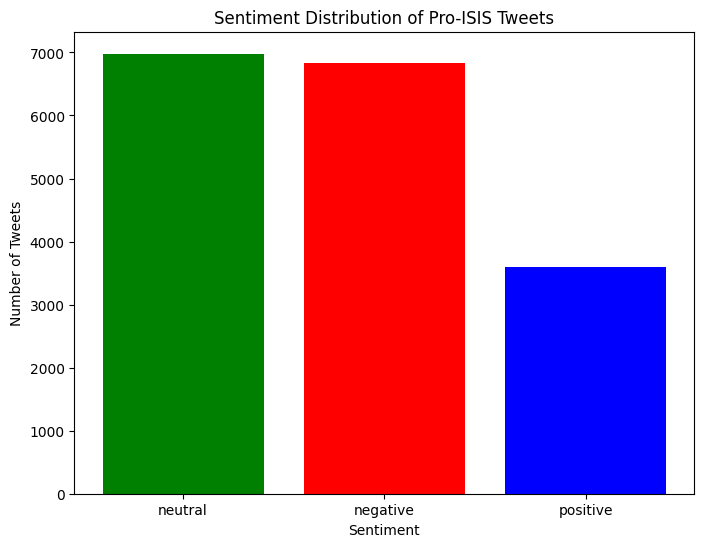

In [36]:
# Count the number of tweets for each sentiment type
sentiment_counts = df['Sentiment_Type'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Distribution of Pro-ISIS Tweets')
plt.show()


# Word cloud visualization

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


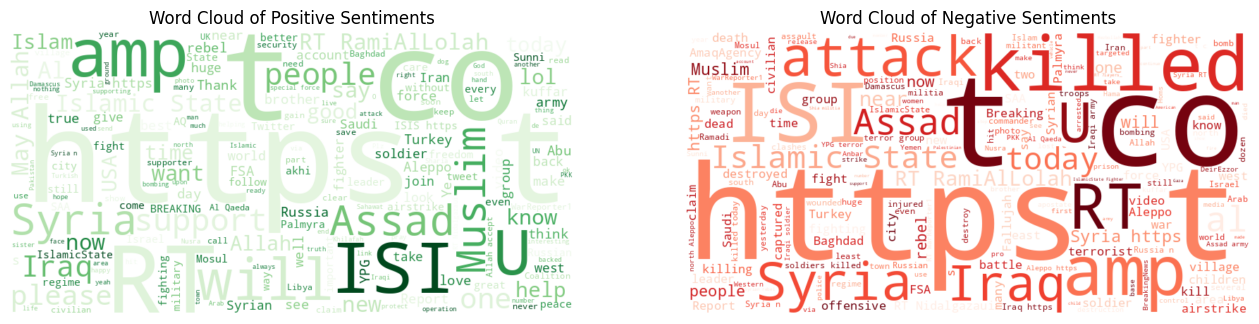

In [29]:
from wordcloud import WordCloud
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize sentiment analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Extract tweet text and analyze sentiment
df['Sentiment'] = df['tweets'].apply(lambda tweet: sia.polarity_scores(tweet)['compound'])

# Generate word cloud for positive and negative sentiments
positive_tweets = ' '.join(df[df['Sentiment'] > 0]['tweets'])
negative_tweets = ' '.join(df[df['Sentiment'] < 0]['tweets'])

wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_tweets)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_tweets)

# Plot word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Sentiments')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Sentiments')

plt.show()


# IV. Timeline View:

In [34]:
import plotly.express as px

# Convert date to datetime format
df['time'] = pd.to_datetime(df['time'])

# Create timeline plot
fig = px.histogram(df, x='time', nbins=50, title='Tweets Frequency Over Time')
fig.show()


# Conclusion:

This project aimed to provide a detailed analysis of pro-ISIS activities on Twitter post the Paris Attacks in 2015. The analysis identified key influencers, common keywords, and sentiment towards various clergy figures. Our research also revealed, among other things that, from 2015 to 2016, ISIS fans greatly increased their activities on Twitter.
A sentiment analyis of their online exchanges revealed predominantly negative sentiments, but also some positive sentiments around symbolic places or name such as Syria, Assad, the Islamic state,  Baghdad, Russia, and notions such as fight, soldier, group, muslin, people, killed, west, attacks, etc.
The insights of both the network analysis and the sentiment analysis could be valuable intelligence for security agencies and researchers studying online radicalization and extremist networks. These insights can also help policy makers design and implement more effective counterterrorism policies.